In [396]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import time
from sklearn.cluster import KMeans

In [289]:
start = time.time()
diabets = pd.read_csv('datasets/pima-indians-diabetes.csv' ).dropna(how = 'all')
print(time.time() - start)
diabets.dtypes

0.004862070083618164


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [290]:
diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [291]:
diabets.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [292]:
diabets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [293]:
diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [294]:
diabets['Pregnancies'] = diabets['Pregnancies'].apply(lambda x: 0 if x == 1 else 1)

In [295]:
diabets['BloodPressure'] = diabets['BloodPressure'].replace(0, 69)

In [296]:
diabets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,148,72,35,0,33.6,0.627,50,1
1,0,85,66,29,0,26.6,0.351,31,0
2,1,183,64,0,0,23.3,0.672,32,1
3,0,89,66,23,94,28.1,0.167,21,0
4,1,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,1,101,76,48,180,32.9,0.171,63,0
764,1,122,70,27,0,36.8,0.340,27,0
765,1,121,72,23,112,26.2,0.245,30,0
766,0,126,60,0,0,30.1,0.349,47,1


In [297]:
diabets['BMI'].mean()

31.992578124999998

In [298]:
diabets['BMI'] = diabets['BMI'].replace(0, 31.99)

In [299]:
diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,148,72,35,0,33.6,0.627,50,1
1,0,85,66,29,0,26.6,0.351,31,0
2,1,183,64,0,0,23.3,0.672,32,1
3,0,89,66,23,94,28.1,0.167,21,0
4,1,137,40,35,168,43.1,2.288,33,1


In [300]:
diabets['Glucose'].mean()

120.89453125

In [301]:
diabets['Glucose'] = diabets['Glucose'].replace(0, 120)

In [302]:
diabets['SkinThickness'].mean()

20.536458333333332

In [303]:
diabets['SkinThickness'] = diabets['SkinThickness'].replace(0, 20)

In [304]:
diabets['Insulin'].mean()

79.79947916666667

In [305]:
diabets['Insulin'] = diabets['Insulin'].replace(0 , 79)

In [306]:
pregnent_series = diabets['Pregnancies']

In [307]:
klass_series = diabets['Outcome']

In [308]:
diabets = diabets.drop(columns=['Pregnancies', 'Outcome'])

In [309]:
# Get column names first
cols = diabets.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_diabets = scaler.fit_transform(diabets)
scaled_STD_diabets = pd.DataFrame(scaled_diabets, columns=cols)

In [310]:
scaled_STD_diabets.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.865461,-0.020645,0.879163,-0.421437,0.167261,0.468492,1.425995
1,-1.205788,-0.516132,0.262357,-0.421437,-0.851529,-0.365061,-0.190672
2,2.016154,-0.681294,-0.662852,-0.421437,-1.331815,0.604397,-0.105584
3,-1.074281,-0.516132,-0.354449,-0.260464,-0.633217,-0.920763,-1.041549
4,0.503814,-2.663240,0.879163,0.533672,1.549904,5.484909,-0.020496


In [311]:
scaled_STD_diabets['Pregnancies'] = pregnent_series

In [312]:
scaled_STD_diabets['Outcome'] = klass_series

In [313]:
scaled_STD_diabets.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.865461,-0.020645,0.879163,-0.421437,0.167261,0.468492,1.425995,1,1
1,-1.205788,-0.516132,0.262357,-0.421437,-0.851529,-0.365061,-0.190672,0,0
2,2.016154,-0.681294,-0.662852,-0.421437,-1.331815,0.604397,-0.105584,1,1
3,-1.074281,-0.516132,-0.354449,-0.260464,-0.633217,-0.920763,-1.041549,0,0
4,0.503814,-2.663240,0.879163,0.533672,1.549904,5.484909,-0.020496,1,1


In [314]:
scaled_STD_diabets.to_csv('datasets/scaled_STD_diabets.csv', index=False)

In [315]:
cols = diabets.columns
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
sclaed_MINMAX_diabets = min_max_scaler.fit_transform(diabets)

# Run the normalizer on the dataframe
sclaed_MINMAX_diabets = pd.DataFrame(sclaed_MINMAX_diabets , columns=cols)

In [316]:
sclaed_MINMAX_diabets['Pregnancies'] = pregnent_series

In [317]:
sclaed_MINMAX_diabets['Outcome'] = klass_series

In [318]:
sclaed_MINMAX_diabets.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.078125,0.314928,0.234415,0.483333,1,1
1,0.264516,0.428571,0.239130,0.078125,0.171779,0.116567,0.166667,0,0
2,0.896774,0.408163,0.141304,0.078125,0.104294,0.253629,0.183333,1,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1,1


In [319]:
sclaed_MINMAX_diabets.to_csv('datasets/scaled_MINMAX_diabets.csv', index=False)

In [375]:
MINMAX_data_frame = pd.read_csv('datasets/scaled_MINMAX_diabets.csv')

In [376]:
MINMAX_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Pregnancies                 768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

In [378]:
Outcome_save = MINMAX_data_frame['Outcome']
Pregnecies_save = MINMAX_data_frame['Pregnancies']
del MINMAX_data_frame['Outcome']
del MINMAX_data_frame['Pregnancies']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


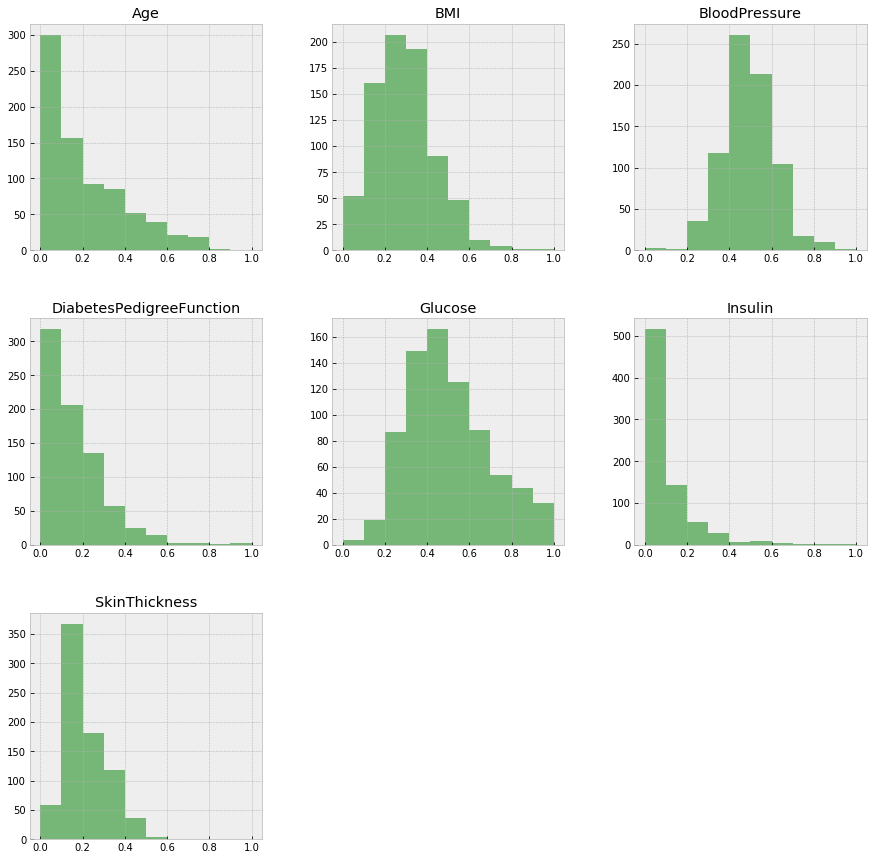

In [379]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
MINMAX_data_frame.hist(ax=ax , color = 'g' , alpha = 0.5)
plt.style.use('bmh')
plt.show()

In [380]:
MINMAX_data_frame['Pregnancies'] = Pregnecies_save 
MINMAX_data_frame['Outcome'] = Outcome_save 


In [381]:
MINMAX_data_frame

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.078125,0.314928,0.234415,0.483333,1,1
1,0.264516,0.428571,0.239130,0.078125,0.171779,0.116567,0.166667,0,0
2,0.896774,0.408163,0.141304,0.078125,0.104294,0.253629,0.183333,1,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,1,0
764,0.503226,0.469388,0.217391,0.078125,0.380368,0.111870,0.100000,1,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,1,0
766,0.529032,0.367347,0.141304,0.078125,0.243354,0.115713,0.433333,0,1


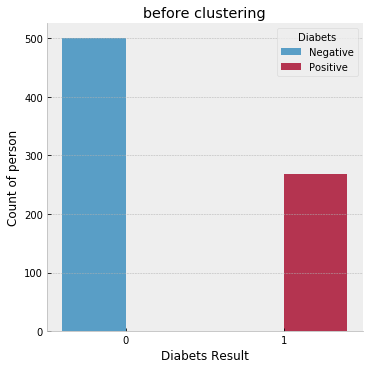

In [382]:
snsplot = sns.catplot( x ='Outcome' , data = MINMAX_data_frame , kind ='count' , saturation = 1 , hue = 'Outcome'  , alpha = 0.8 )
plt.legend(title='Diabets', loc='upper right', labels=['Negative', 'Positive'])
plt.xlabel('Diabets Result')
plt.ylabel('Count of person')
plt.title('before clustering')
plt.show()
snsplot.savefig('count_beforeClustering.jpeg')

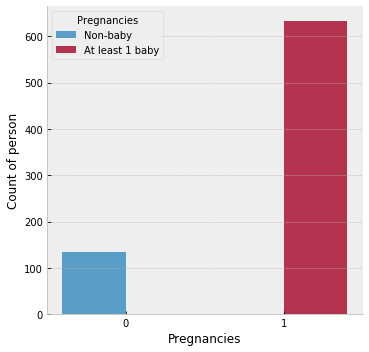

In [383]:
sns.catplot( x ='Pregnancies' , data = MINMAX_data_frame , kind ='count' , hue = 'Pregnancies' , saturation = 1 , alpha = 0.8)
plt.legend(title='Pregnancies', loc='upper left', labels=['Non-baby', 'At least 1 baby'])
plt.xlabel('Pregnancies')
plt.ylabel('Count of person')
plt.show()

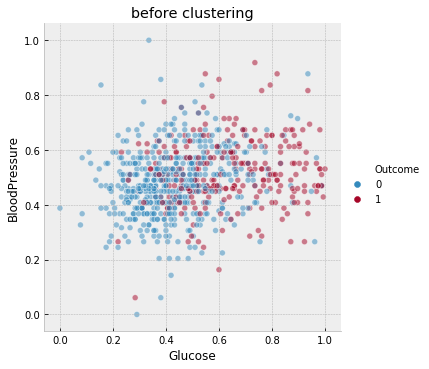

In [384]:
snsplot = sns.relplot(x ='Glucose', y ='BloodPressure', data = MINMAX_data_frame ,  kind ='scatter' , hue = 'Outcome' , alpha = 0.5 )
plt.title('before clustering')
plt.show()
snsplot.savefig('beforeClustering.jpeg')

In [386]:
del MINMAX_data_frame['Outcome']
del MINMAX_data_frame['Pregnancies']

In [387]:
km = KMeans(n_clusters=2 ,max_iter=100)
predict = km.fit_predict(MINMAX_data_frame)

In [388]:
MINMAX_data_frame['Cluster'] = predict

In [391]:
MINMAX_data_frame['Cluster'] = MINMAX_data_frame['Cluster'].apply(lambda x: 1 if x == 0 else 0)

In [393]:
MINMAX_data_frame

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,0.670968,0.489796,0.304348,0.078125,0.314928,0.234415,0.483333,1
1,0.264516,0.428571,0.239130,0.078125,0.171779,0.116567,0.166667,0
2,0.896774,0.408163,0.141304,0.078125,0.104294,0.253629,0.183333,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,1
764,0.503226,0.469388,0.217391,0.078125,0.380368,0.111870,0.100000,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0
766,0.529032,0.367347,0.141304,0.078125,0.243354,0.115713,0.433333,1


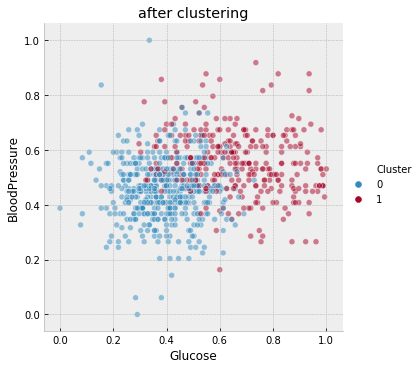

In [394]:
snsplot = sns.relplot(x ='Glucose', y ='BloodPressure', data = MINMAX_data_frame ,  kind ='scatter' , hue = 'Cluster' , alpha = 0.5 )
plt.title('after clustering')
plt.show()
snsplot.savefig('afterClustering.jpeg')

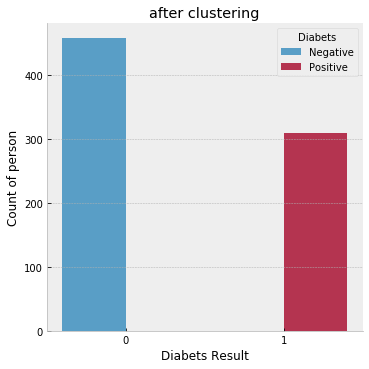

In [395]:
snsplot = sns.catplot( x ='Cluster' , data = MINMAX_data_frame , kind ='count' , saturation = 1 , hue = 'Cluster'  , alpha = 0.8 )
plt.legend(title='Diabets', loc='upper right', labels=['Negative', 'Positive'])
plt.xlabel('Diabets Result')
plt.ylabel('Count of person')
plt.title('after clustering')
plt.show()
snsplot.savefig('count_afterClustering.jpeg')